In [84]:
import pandas as pd
import numpy as np

In [85]:
df = pd.read_csv("car_data.csv")

In [86]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [88]:
df.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [89]:
df = pd.get_dummies(df,columns = ['Gender'],drop_first = True)

In [90]:
df

,User ID,Age,AnnualSalary,Purchased,Gender_Male
0,385,35,20000,0,True
1,681,40,43500,0,True
2,353,49,74000,0,True
3,895,40,107500,1,True
4,661,25,79000,0,True
...,...,...,...,...,...
995,863,38,59000,0,True
996,800,47,23500,0,False
997,407,28,138500,1,False
998,299,48,134000,1,False


In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

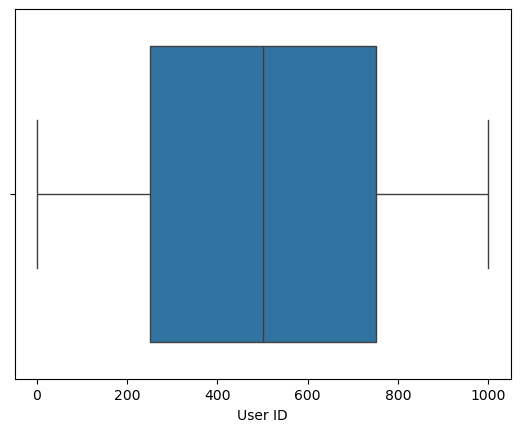

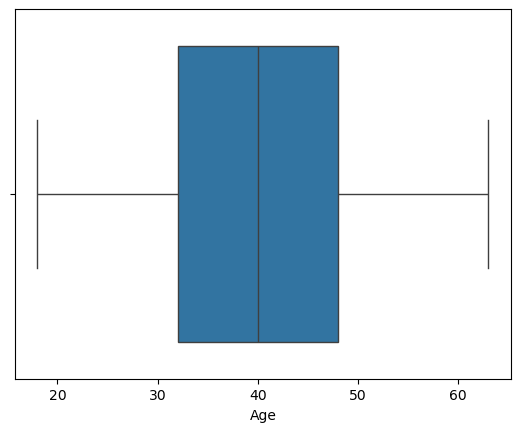

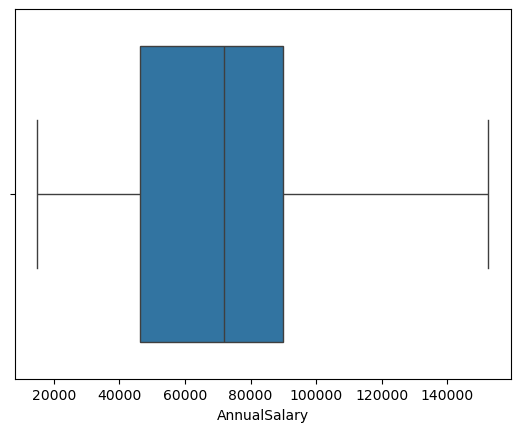

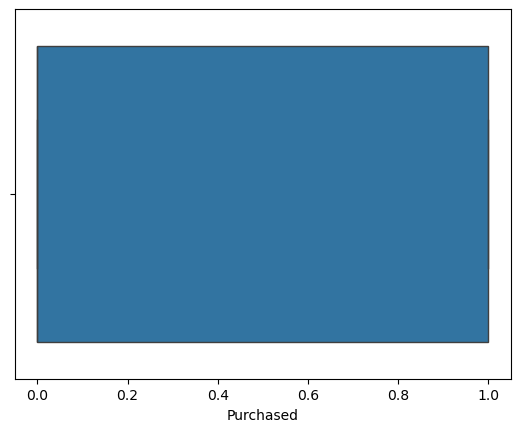

In [92]:
for i in df.select_dtypes(include = "number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [93]:
x = df.drop(['User ID','Purchased'],axis=1)

In [94]:
y = df['Purchased']

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [96]:
x_train

,Age,AnnualSalary,Gender_Male
687,26,84000,False
500,40,57000,True
332,33,19500,True
979,32,59500,True
817,37,53500,True
...,...,...,...
835,42,53500,True
192,26,118000,False
629,61,84500,True
559,30,62000,False


In [97]:
y_train

687    0
500    0
332    0
979    0
817    0
      ..
835    0
192    0
629    1
559    0
684    0
Name: Purchased, Length: 800, dtype: int64

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaler = StandardScaler()

In [100]:
scaler.fit(x_train)

StandardScaler()

In [101]:
x_train = scaler.transform(x_train)

In [102]:
x_test = scaler.transform(x_test)

In [123]:
x_train

array([[-1.33361157,  0.32134116, -0.98019606],
       [-0.02339669, -0.45583598,  1.02020406],
       [-0.67850413, -1.53524866,  1.02020406],
       ...,
       [ 1.94192562,  0.33573332,  1.02020406],
       [-0.95926446, -0.31191429, -0.98019606],
       [-1.98871901, -0.78685587, -0.98019606]])

In [125]:
#Decision Tree model

In [127]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [129]:
dt = DecisionTreeClassifier(random_state=42)

In [131]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [133]:
y_pred = dt.predict(x_test)

In [135]:
from sklearn.metrics import accuracy_score

In [137]:
accuracy = accuracy_score(y_test,y_pred)

In [139]:
print(accuracy)

0.905


In [141]:
#plotting the tree

In [149]:
feature_names = ['Age', 'AnnualSalary', 'Gender_Male']
class_names = ['not purchased','purchased']

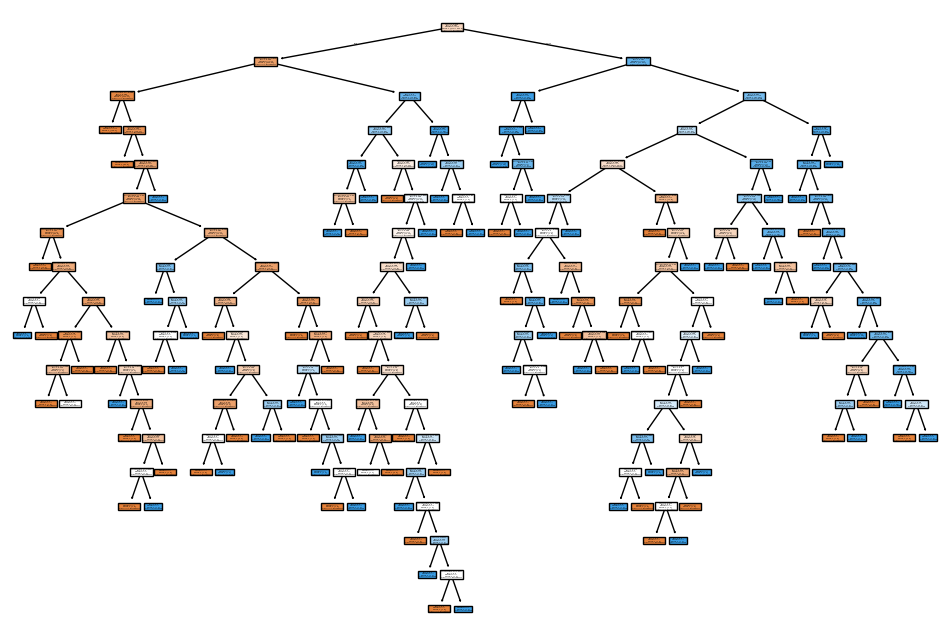

In [153]:
plt.figure(figsize = (12,8))
plot_tree(dt, feature_names = feature_names, class_names = class_names, filled = True)
plt.show()

In [155]:
#hyperparameter tuning

In [157]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [161]:
from sklearn.model_selection import GridSearchCV

In [163]:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [167]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [169]:
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [173]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(x_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the best model: {accuracy_best:.2f}")

Accuracy of the best model: 0.93
